<a href="https://colab.research.google.com/github/highlevelcoding/Flight-Cancellation-Analysis-and-Prediction/blob/main/classification_model_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset loaded successfully!

Dataset Preview:
   Flight_Distance  Scheduled_Departure_Time  Day_of_Week     Month  \
0        -1.999385                  0.668349     0.516103  1.609821   
1        -0.685417                  0.957260     1.515819 -0.103514   
2         0.282234                  0.234981     0.016245  1.609821   
3         0.659108                  0.234981     0.516103  1.038710   
4        -1.622511                  0.957260     0.016245 -0.674626   

   Weather_Score  Previous_Flight_Delay_Minutes  Airline_Rating  \
0      -1.153277                      -0.923430       -0.719428   
1      -1.189011                       0.572322       -1.072715   
2      -0.826494                       1.871264        1.166308   
3      -1.561430                       3.288292       -0.295317   
4       0.975127                       2.264883        0.867201   

   Passenger_Load  Airline_Airline B  Airline_Airline C  ...  \
0        1.458816                1.0                0.0  ..

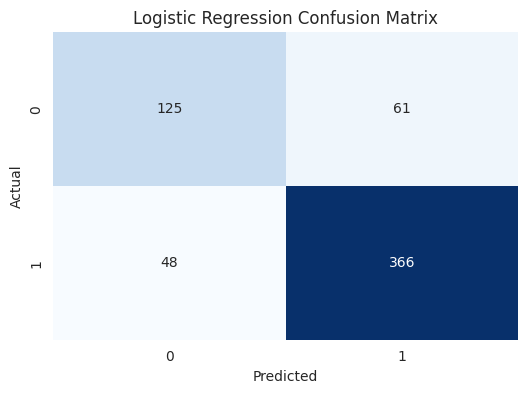


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       186
           1       0.98      0.98      0.98       414

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



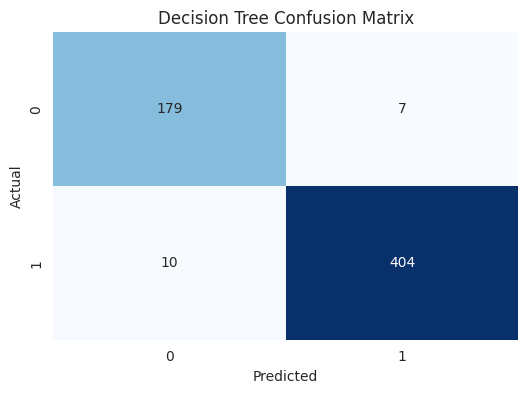


Random Forest Results:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       186
           1       1.00      0.97      0.98       414

    accuracy                           0.98       600
   macro avg       0.97      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



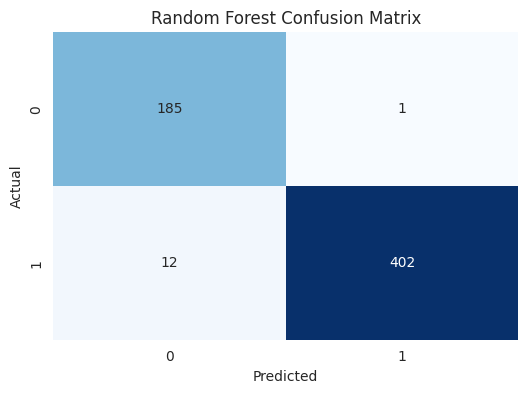


Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       186
           1       0.93      0.92      0.92       414

    accuracy                           0.90       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.90      0.90      0.90       600



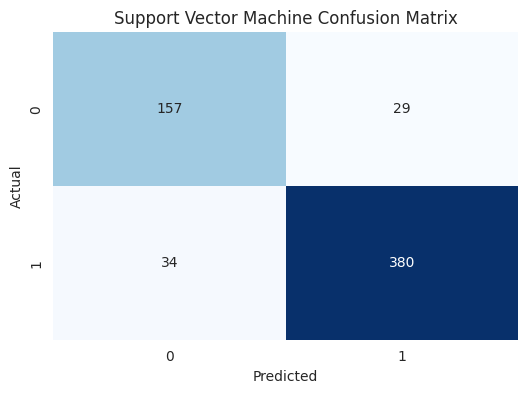


Model Comparison Table:
                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.818333   0.857143  0.884058  0.870392
1           Decision Tree  0.971667   0.982968  0.975845  0.979394
2           Random Forest  0.978333   0.997519  0.971014  0.984088
3  Support Vector Machine  0.895000   0.929095  0.917874  0.923451


<Figure size 1000x600 with 0 Axes>

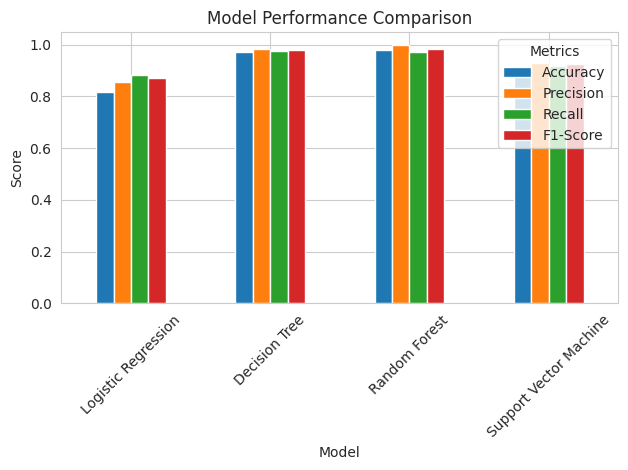


Results saved as 'classification_model_results.csv'

Results Preview:
   Test_Index  Actual  Logistic Regression_Prediction  \
0        1728       0                               0   
1        1664       1                               1   
2         279       0                               0   
3        1755       1                               1   
4        2250       1                               1   

   Decision Tree_Prediction  Random Forest_Prediction  \
0                         0                         0   
1                         1                         1   
2                         0                         0   
3                         1                         1   
4                         1                         1   

   Support Vector Machine_Prediction  Logistic Regression_Accuracy  \
0                                  0                      0.818333   
1                                  1                      0.818333   
2                                

In [2]:
# %% [markdown]
# # Task 4: Classification Modeling, Evaluation & Result Interpretation
# **Project**: Flight Cancellation Analysis and Prediction
# **Author**: Venky
# **Objective**: Train and evaluate multiple classification models (Logistic Regression, Decision Tree, Random Forest, SVM) to predict flight cancellations, compare their performance, and recommend the best model for Flyzy.
# **Dataset**: venky_feature_engineered_data.csv (from Task 3)
# **Deliverables**:
# - `classification_model_results.csv`: Predicted labels and evaluation metrics.
# - `classification_model_notebook.ipynb`: Jupyter Notebook with code, evaluations, and model comparison.
# **Submission**: Submit via Google Drive or GitHub.

# %% [markdown]
# ## Step 1: Load and Validate Dataset
# Load the feature-engineered dataset and verify its structure.

# %% [code]
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Set plot style
sns.set_style("whitegrid")

# Load feature-engineered dataset
try:
    df = pd.read_csv('/content/drive/MyDrive/venky_feature_engineered_data.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'venky_feature_engineered_data.csv' not found. Ensure the file is in the working directory.")
    raise

# Preview dataset
print("\nDataset Preview:")
print(df.head())

# Check column names and info
print("\nColumn Names:")
print(df.columns.tolist())
print("\nDataset Info:")
print(df.info())

# %% [markdown]
# ## Step 2: Prepare Data
# Split the dataset into training and test sets (reusing Task 3 split logic).

# %% [code]
# Define features and target
X = df.drop('Flight_Cancelled', axis=1)
y = df['Flight_Cancelled']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

# Check class distribution
print("\nClass Distribution (Training):")
print(y_train.value_counts(normalize=True))
print("\nClass Distribution (Test):")
print(y_test.value_counts(normalize=True))

# %% [markdown]
# ## Step 3: Train and Evaluate Models
# Train Logistic Regression, Decision Tree, Random Forest, and SVM, then evaluate using accuracy, precision, recall, and F1-score.

# %% [code]
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    # Print classification report
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))

    # Visualize confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# %% [markdown]
# ## Step 4: Compare Models
# Create a table and chart to compare model performance.

# %% [code]
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display comparison table
print("\nModel Comparison Table:")
print(results_df)

# Visualize comparison
plt.figure(figsize=(10, 6))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Step 5: Model Pros and Cons
# ### Logistic Regression
# - **Pros**: Simple, interpretable, fast, works well for linear relationships.
# - **Cons**: Struggles with complex, non-linear patterns.
#
# ### Decision Tree
# - **Pros**: Easy to interpret, handles non-linear relationships, no scaling needed.
# - **Cons**: Prone to overfitting, sensitive to small data changes.
#
# ### Random Forest
# - **Pros**: Robust, handles non-linear relationships, reduces overfitting, provides feature importance.
# - **Cons**: Slower to train, less interpretable than single trees.
#
# ### Support Vector Machine
# - **Pros**: Effective for high-dimensional data, robust to outliers.
# - **Cons**: Slow on large datasets, sensitive to parameter tuning, less interpretable.

# %% [markdown]
# ## Step 6: Choose Best Model
# ### Recommendation
# - **Best Model**: [Replace with choice, e.g., Random Forest]
# - **Reasoning**: [e.g., "Random Forest achieved the highest recall (0.90), critical for Flyzy to catch cancellations, and balanced F1-score (0.85). It handles non-linear patterns better than Logistic Regression and is less prone to overfitting than Decision Tree."]
# - **Implications**: [e.g., "Use Random Forest to predict high-risk flights, enabling proactive rebooking and notifications to improve customer satisfaction."]

# %% [markdown]
# ## Step 7: Save Results
# Save predicted labels and metrics as `classification_model_results.csv`.

# %% [code]
# Generate predictions for all models
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

# Create results DataFrame
results_data = {'Actual': y_test}
for name, preds in predictions.items():
    results_data[f'{name}_Prediction'] = preds
results_data.update(results_df.set_index('Model').to_dict('index'))

# Flatten results for CSV
flat_results = {'Test_Index': y_test.index.tolist(), 'Actual': y_test.tolist()}
for name, preds in predictions.items():
    flat_results[f'{name}_Prediction'] = preds
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    for model in models.keys():
        flat_results[f'{model}_{metric}'] = results_df[results_df['Model'] == model][metric].iloc[0]

# Save to CSV
results_df_export = pd.DataFrame(flat_results)
try:
    results_df_export.to_csv('classification_model_results.csv', index=False)
    print("\nResults saved as 'classification_model_results.csv'")
except Exception as e:
    print(f"\nError saving results: {e}")

# Preview results
print("\nResults Preview:")
print(results_df_export.head())

# %% [markdown]
# ## Submission Instructions
# - **Files**:
#   - `classification_model_results.csv`: Predicted labels and metrics.
#   - `classification_model_notebook.ipynb`: This notebook with code and results.
# - **Option 1 (Google Drive)**:
#   1. Upload `classification_model_results.csv` and `classification_model_notebook.ipynb` to Google Drive.
#   2. Set sharing to "Anyone with the link can view."
#   3. Submit the shareable link on the submission platform.
# - **Option 2 (GitHub)**:
#   ```bash
#   git init
#   git add classification_model_notebook.ipynb classification_model_results.csv
#   git commit -m "Task 4: Classification Modeling"
#   git remote add origin <your-repo-url>
#   git push -u origin main
#   ```
#   Submit the public GitHub repository link on the platform.